In [3]:
import pandas as pd

# Create DataFrame
data = {
    "gender": ["male", "female", "male", "female", "male", "female", "male", "female", "male", "female"],
    "ethnicity": ["group A", "group B", "group C", "group D", "group E", "group A", "group B", "group C", "group D", "group E"],
    "parental level of education": ["bachelor's degree", "some college", "master's degree", "associate's degree", "high school",
                                    "some high school", "bachelor's degree", "associate's degree", "some college", "master's degree"],
    "lunch": ["standard", "free/reduced", "standard", "free/reduced", "standard", "free/reduced", "standard", "free/reduced", "standard", "standard"],
    "test preparation course": ["none", "completed", "none", "completed", "none", "completed", "none", "completed", "none", "completed"],
    "math score": [78, 92, 69, 88, 55, 76, 82, 90, 61, 95],
    "reading score": [72, 95, 70, 84, 58, 80, 78, 92, 65, 98],
    "writing score": [74, 98, 72, 86, 60, 82, 80, 94, 68, 99]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("studentdata.csv", index=False)

print("File saved as studentdata.csv")

import pandas as pd

# Load the CSV file
df = pd.read_csv("studentdata.csv")

# Display the first few rows
print(df.head())

File saved as studentdata.csv
   gender ethnicity parental level of education         lunch  \
0    male   group A           bachelor's degree      standard   
1  female   group B                some college  free/reduced   
2    male   group C             master's degree      standard   
3  female   group D          associate's degree  free/reduced   
4    male   group E                 high school      standard   

  test preparation course  math score  reading score  writing score  
0                    none          78             72             74  
1               completed          92             95             98  
2                    none          69             70             72  
3               completed          88             84             86  
4                    none          55             58             60  


   gender ethnicity parental level of education         lunch  \
0    male   group A           bachelor's degree      standard   
1  female   group B                some college  free/reduced   
2    male   group C             master's degree      standard   
3  female   group D          associate's degree  free/reduced   
4    male   group E                 high school      standard   

  test preparation course  math score  reading score  writing score  
0                    none          78             72             74  
1               completed          92             95             98  
2                    none          69             70             72  
3               completed          88             84             86  
4                    none          55             58             60  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                    

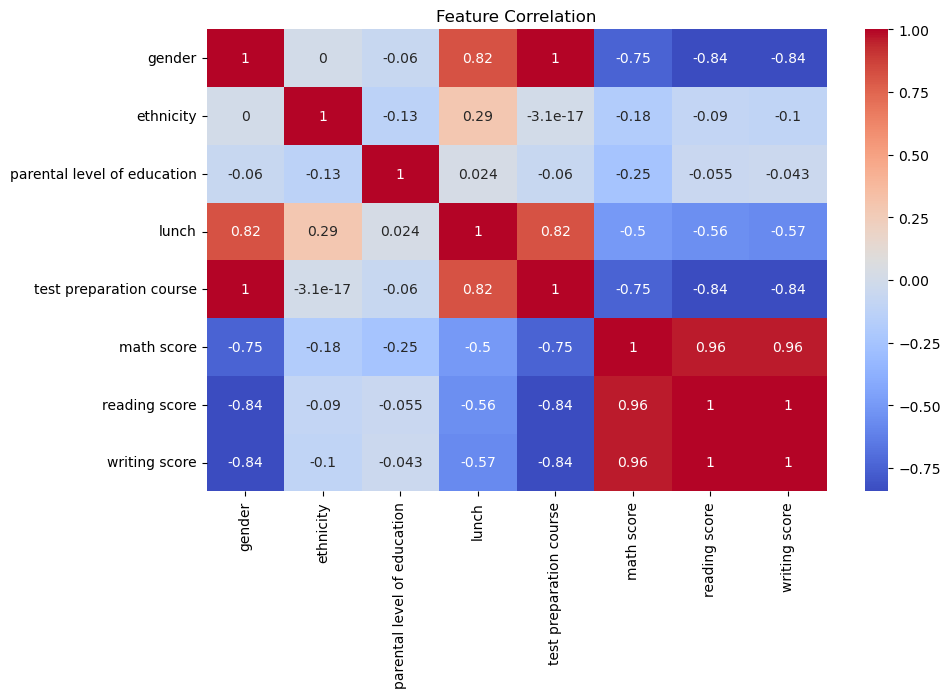

Mean Absolute Error: 10.521741763565853
R-squared Score: 0.4398612855647843


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


df = pd.read_csv("studentdata.csv")


print(df.head())
print(df.info())


encoder = LabelEncoder()
categorical_cols = ["gender", "ethnicity", "parental level of education", "lunch", "test preparation course"]
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


X = df.drop(columns=["math score", "reading score", "writing score"])  # Independent variables
y = df[["math score", "reading score", "writing score"]]  # Dependent variables


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))